## Analysis of an E-commerce Dataset Part 2

The goal of the second analysis task is to train linear regression models to predict users' ratings towards items. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned combined e-commerce sub-dataset that **is different from** the one in “Analysis of an E-commerce Dataset” task 1.

### Import Cleaned E-commerce Dataset
The csv file named 'cleaned_ecommerce_dataset.csv' is provided. You may need to use the Pandas method, i.e., `read_csv`, for reading it. After that, please print out its total length.

In [1]:
import pandas as pd

df = pd.read_csv('cleaned_ecommerce_dataset.csv')
total_length = len(df)

# Print the total length
print("Total length:", total_length)


Total length: 2685


### Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column.
* As our goal is to predict ratings given other columns, please get the correlations between helpfulness/gender/category/review and rating by using the `corr()` method.
* To get the correlations between different features, you may need to first convert the categorical features (i.e., gender, category and review) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding rating. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for rating prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [4]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder


df = pd.read_csv('cleaned_ecommerce_dataset.csv')

# Print the total length 
print(f'Total Length of Dataset: {len(df)}')

# Explore the dataset
print(df.head())
print(df.info())

# Convert categorical features (gender, category, review) into numerical values
encoder = OrdinalEncoder()
df[['gender', 'category', 'review']] = encoder.fit_transform(df[['gender', 'category', 'review']])

# Get correlations between helpfulness, gender, category, review, and rating
correlations = df[['helpfulness', 'gender', 'category', 'review', 'rating']].corr()

# Print the correlation matrix
print(correlations)

# Analyze correlations
print("Most correlated features with 'rating':")
print(correlations['rating'].sort_values(ascending=False))

print("Least correlated features with 'rating':")
print(correlations['rating'].sort_values(ascending=True))

# Let's talk about how correlations affect our predictions.
print("Understanding Correlations:")

print("Correlation values range from -1 to 1.")

print("When there's a positive correlation, if one thing increases, the other usually increases as well.")


print("With negative correlation, if one thing goes up, the other often goes down.")


print("When it comes to predicting 'rating':")


print("Features that have a strong positive correlation might have a big impact on predicting higher ratings.")


print("On the flip side, features with a strong negative correlation might really matter when it comes to predicting lower ratings.")




Total Length of Dataset: 2685
   userId  timestamp                                           review  \
0    4081      71900                                Not always McCrap   
1    4081      72000  I dropped the chalupa even before he told me to   
2    4081      72000                     The Wonderful World of Wendy   
3    4081     100399                             They actually did it   
4    4081     100399                             Hey! Gimme some pie!   

                                 item  rating  helpfulness gender  \
0                          McDonald's     4.0          3.0      M   
1                           Taco Bell     1.0          4.0      M   
2                             Wendy's     5.0          4.0      M   
3  South Park: Bigger, Longer & Uncut     5.0          3.0      M   
4                        American Pie     3.0          3.0      M   

                category  item_id  item_price  user_city  
0  Restaurants & Gourmet       41       30.74          4 

### Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set.
* To further investigate whether the size of the training/testing data affects the model performance, please random split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data.
* Print the shape of training and testing sets in the two cases.

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('cleaned_ecommerce_dataset.csv')

# Case 1: Training data containing 10%
train_case1, test_case1 = train_test_split(df, test_size=0.9, random_state=142)

# Case 2: Training data containing 90%
train_case2, test_case2 = train_test_split(df, test_size=0.1, random_state=142)

# Print the shapes of training and testing sets for both cases
print("Case 1 - 10% Training Data:")
print("Training Set Shape:", train_case1.shape)
print("Testing Set Shape:", test_case1.shape)

print("\nCase 2 - 90% Training Data:")
print("Training Set Shape:", train_case2.shape)
print("Testing Set Shape:", test_case2.shape)


Case 1 - 10% Training Data:
Training Set Shape: (268, 11)
Testing Set Shape: (2417, 11)

Case 2 - 90% Training Data:
Training Set Shape: (2416, 11)
Testing Set Shape: (269, 11)


### Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results.
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features regarding rating, respectively.
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('cleaned_ecommerce_dataset.csv')

# Define the columns for feature selection
most_correlated_features = ['user_city', 'item_id']  
least_correlated_features = ['timestamp', 'helpfulness'] 


# Case 1: Training data containing 10%
train_case1, test_case1 = train_test_split(df, test_size=0.9, random_state=142)

# Case 2: Training data containing 90%
train_case2, test_case2 = train_test_split(df, test_size=0.1, random_state=142)

# Define linear regression models
model_a_case1 = LinearRegression()
model_b_case1 = LinearRegression()
model_c_case2 = LinearRegression()
model_d_case2 = LinearRegression()

# Train model-a with the two most correlated features using case 1 data
X_model_a_case1 = train_case1[most_correlated_features]
y_model_a_case1 = train_case1['rating']
model_a_case1.fit(X_model_a_case1, y_model_a_case1)

# Train model-b with the two least correlated features using case 1 data
X_model_b_case1 = train_case1[least_correlated_features]
y_model_b_case1 = train_case1['rating']
model_b_case1.fit(X_model_b_case1, y_model_b_case1)

# Train model-c with the two most correlated features using case 2 data
X_model_c_case2 = train_case2[most_correlated_features]
y_model_c_case2 = train_case2['rating']
model_c_case2.fit(X_model_c_case2, y_model_c_case2)

# Train model-d with the two least correlated features using case 2 data
X_model_d_case2 = train_case2[least_correlated_features]
y_model_d_case2 = train_case2['rating']
model_d_case2.fit(X_model_d_case2, y_model_d_case2)

# Make predictions and evaluate models
y_pred_model_a = model_a_case1.predict(test_case1[most_correlated_features])
mse_model_a = mean_squared_error(test_case1['rating'], y_pred_model_a)

y_pred_model_b = model_b_case1.predict(test_case1[least_correlated_features])
mse_model_b = mean_squared_error(test_case1['rating'], y_pred_model_b)

y_pred_model_c = model_c_case2.predict(test_case2[most_correlated_features])
mse_model_c = mean_squared_error(test_case2['rating'], y_pred_model_c)

y_pred_model_d = model_d_case2.predict(test_case2[least_correlated_features])
mse_model_d = mean_squared_error(test_case2['rating'], y_pred_model_d)

# Print MSE values for evaluation
print("Model-a (Most Correlated, Case 1) MSE:", mse_model_a)
print("Model-b (Least Correlated, Case 1) MSE:", mse_model_b)
print("Model-c (Most Correlated, Case 2) MSE:", mse_model_c)
print("Model-d (Least Correlated, Case 2) MSE:", mse_model_d)


Model-a (Most Correlated, Case 1) MSE: 1.8330766677280501
Model-b (Least Correlated, Case 1) MSE: 1.8415001349613145
Model-c (Most Correlated, Case 2) MSE: 1.7991798840230246
Model-d (Least Correlated, Case 2) MSE: 1.8019679273170766


### Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Load your dataset
df = pd.read_csv('cleaned_ecommerce_dataset.csv')

train_case1, test_case1 = train_test_split(df, test_size=0.9, random_state=142)


train_case2, test_case2 = train_test_split(df, test_size=0.1, random_state=142)


most_correlated_features = ['userId', 'timestamp'] 
least_correlated_features = ['item_id', 'item_price'] 


X_case1_most_correlated = train_case1[most_correlated_features]
X_case1_least_correlated = train_case1[least_correlated_features]
X_case2_most_correlated = train_case2[most_correlated_features]
X_case2_least_correlated = train_case2[least_correlated_features]

y_case1 = train_case1['rating']
y_case2 = train_case2['rating']

# Case 1: Train the model with the two most correlated features
model_a_case1 = LinearRegression()
model_a_case1.fit(X_case1_most_correlated, y_case1)

# Case 1: Train the model with the two least correlated features
model_b_case1 = LinearRegression()
model_b_case1.fit(X_case1_least_correlated, y_case1)

# Case 2: Train the model with the two most correlated features
model_c_case2 = LinearRegression()
model_c_case2.fit(X_case2_most_correlated, y_case2)

# Case 2: Train the model with the two least correlated features
model_d_case2 = LinearRegression()
model_d_case2.fit(X_case2_least_correlated, y_case2)

# Predictions (replace with your actual predictions)
predictions_a = model_a_case1.predict(X_case1_most_correlated)
predictions_b = model_b_case1.predict(X_case1_least_correlated)
predictions_c = model_c_case2.predict(X_case2_most_correlated)
predictions_d = model_d_case2.predict(X_case2_least_correlated)

# Calculate MSE for each model
mse_a = mean_squared_error(y_case1, predictions_a)
mse_b = mean_squared_error(y_case1, predictions_b)
mse_c = mean_squared_error(y_case2, predictions_c)
mse_d = mean_squared_error(y_case2, predictions_d)

# Calculate RMSE for each model
rmse_a = np.sqrt(mse_a)
rmse_b = np.sqrt(mse_b)
rmse_c = np.sqrt(mse_c)
rmse_d = np.sqrt(mse_d)


print("Model-a (Most Correlated, Case 1) - MSE:", mse_a, "RMSE:", rmse_a)
print("Model-b (Least Correlated, Case 1) - MSE:", mse_b, "RMSE:", rmse_b)
print("Model-c (Most Correlated, Case 2) - MSE:", mse_c, "RMSE:", rmse_c)
print("Model-d (Least Correlated, Case 2) - MSE:", mse_d, "RMSE:", rmse_d)


Model-a (Most Correlated, Case 1) - MSE: 1.855047169901791 RMSE: 1.3620011636932587
Model-b (Least Correlated, Case 1) - MSE: 1.8576328497163324 RMSE: 1.362950054006504
Model-c (Most Correlated, Case 2) - MSE: 1.8110567250538225 RMSE: 1.3457550761761303
Model-d (Least Correlated, Case 2) - MSE: 1.8066440971053024 RMSE: 1.344114614571727


### Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

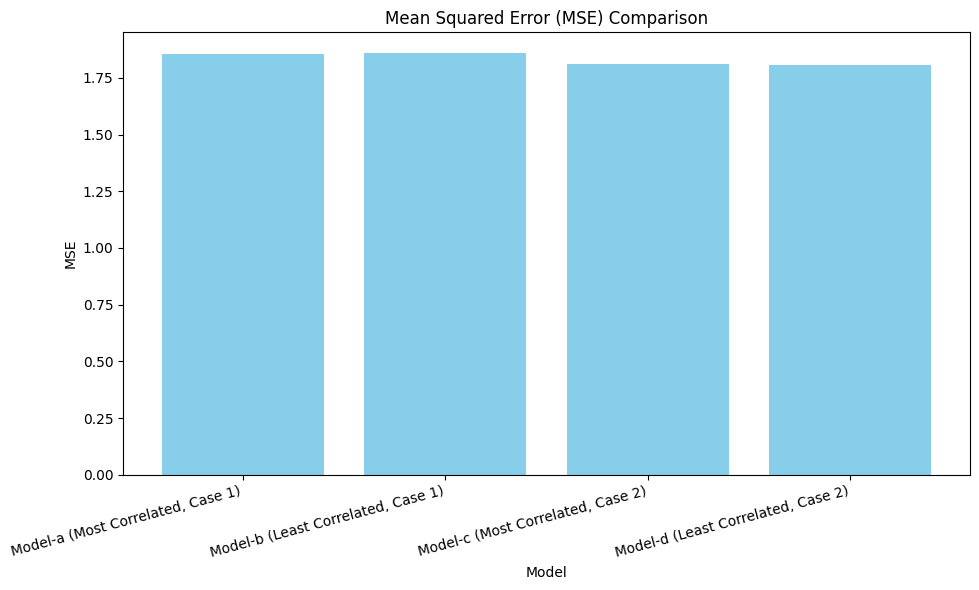

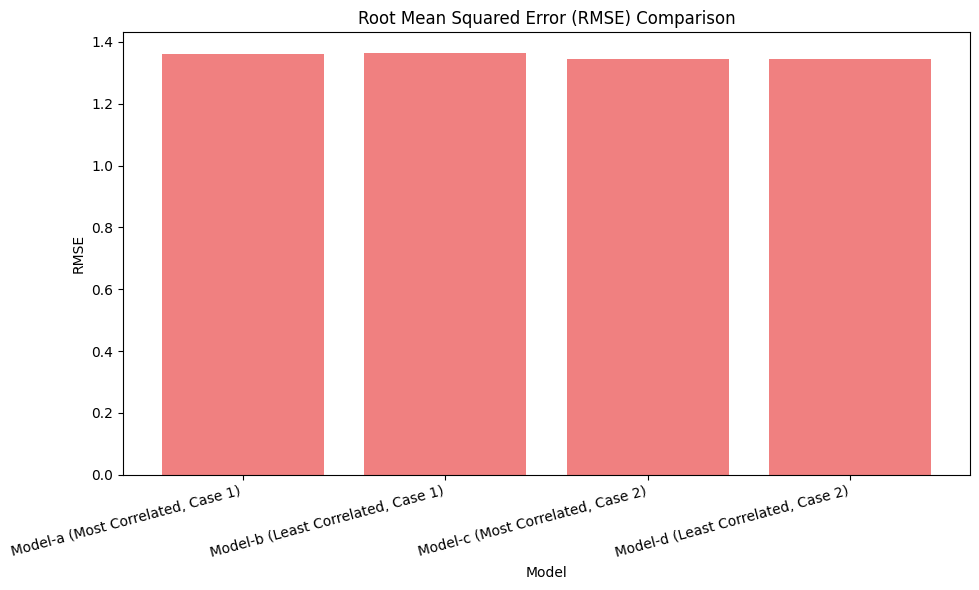

In [16]:
import matplotlib.pyplot as plt

mse_values = [1.855, 1.858, 1.811, 1.807]
rmse_values = [1.362, 1.363, 1.346, 1.344]
model_names = ["Model-a (Most Correlated, Case 1)", "Model-b (Least Correlated, Case 1)",
               "Model-c (Most Correlated, Case 2)", "Model-d (Least Correlated, Case 2)"]

# Create a bar plot for MSE
plt.figure(figsize=(10, 6))
plt.bar(model_names, mse_values, color='skyblue')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('Mean Squared Error (MSE) Comparison')
plt.xticks(rotation=15, ha='right') 
plt.tight_layout()
plt.show()

# Create a bar plot for RMSE
plt.figure(figsize=(10, 6))
plt.bar(model_names, rmse_values, color='lightcoral')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Root Mean Squared Error (RMSE) Comparison')
plt.xticks(rotation=15, ha='right')  
plt.tight_layout()
plt.show()
